### Project Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',100)
df = pd.read_csv('C:/Users/NanoComputer/Desktop/new/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

##### the dataset contains 1480 rows and 81 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

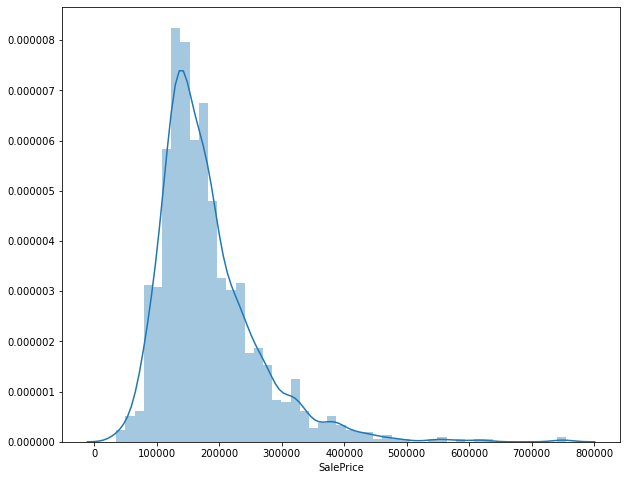

In [6]:
plt.figure(figsize=(10,8))
plt.ticklabel_format(style='plain')
sns.distplot(df.SalePrice)

##### from the graph we can see that the Selling price of the houses is negetively skewked and also have outliers like sale price over 500000 so we can disregard them from the dataset because they will affect our model

In [7]:
len(df[df['SalePrice']>=500000])

9

In [8]:
df = df[df['SalePrice']<=500000]

In [9]:
len(df)

1451

## Visualizing the Sale price distribution

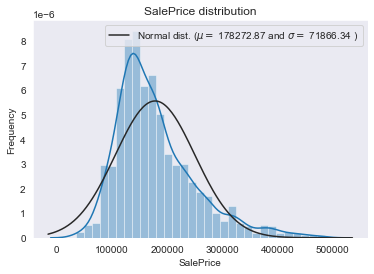

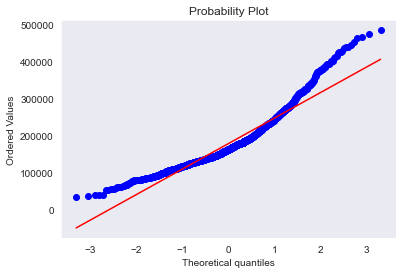

In [10]:
from scipy import stats
sns.set_style('dark')
sns.distplot(df['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['SalePrice'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

#### Now we can take log for the Sale price to ensure that when we build the model the features affect will be same for the low priced houses and higher priced houses

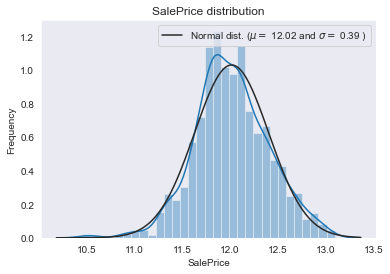

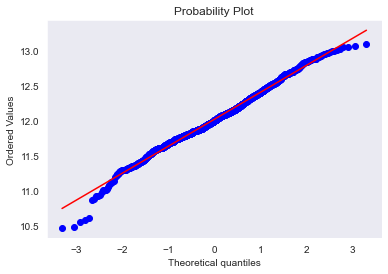

In [11]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['SalePrice'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#QC plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

### Columns which have numerical features and categorical features

In [12]:
numerical_features = df.dtypes[df.dtypes !='object'].index
categorical_features = df.dtypes[df.dtypes =='object'].index
print(numerical_features)
print('*'*100)
print(categorical_features)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation

## Missing values in dataset

In [13]:
missing_values = df.isnull().sum().sort_values(ascending =False)
percentage = (df.isnull().sum()/len(df)).sort_values(ascending =False)
missing_data = pd.concat([missing_values,percentage],axis =1,keys = ['Total','Percentage'])
missing_data.head(30)

,Total,Percentage
PoolQC,1445,0.995865
MiscFeature,1397,0.962784
Alley,1360,0.937285
Fence,1171,0.807030
FireplaceQu,690,0.475534
LotFrontage,259,0.178498
GarageCond,81,0.055824
GarageType,81,0.055824
GarageYrBlt,81,0.055824
GarageFinish,81,0.055824


#### Filling the NAN values in the categorical features as 'None' .
##### (please see the description of the data to know why i have done that)

In [14]:
cat_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
for i in cat_cols:
    df[i].fillna('None',inplace =True)

In [15]:
missing_values = df.isnull().sum().sort_values(ascending =False)
percentage = (df.isnull().sum()/len(df)).sort_values(ascending =False)
missing_data = pd.concat([missing_values,percentage],axis =1,keys = ['Total','Percentage'])
missing_data.head(10)

,Total,Percentage
LotFrontage,259,0.178498
GarageYrBlt,81,0.055824
MasVnrArea,8,0.005513
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000


#### filling the numerical columns missing value with mean of that column

In [16]:
num_cols =['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
for i in num_cols:
    df[i].fillna(df[i].mean(),inplace=True)

In [17]:
missing_values = df.isnull().sum().sort_values(ascending =False)
percentage = (df.isnull().sum()/len(df)).sort_values(ascending =False)
missing_data = pd.concat([missing_values,percentage],axis =1,keys = ['Total','Percentage'])
missing_data.head(10)

,Total,Percentage
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


#### now we have no missing value in the dataset so we can start our modelling

In [18]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429216


#### Some extra visualization

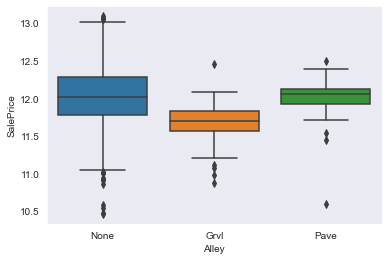

In [19]:
sns.set_style('dark')
sns.boxplot(df.Alley,df.SalePrice)

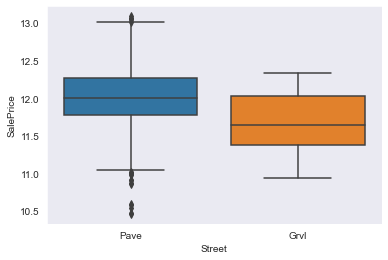

In [20]:
sns.boxplot(df.Street,df.SalePrice)

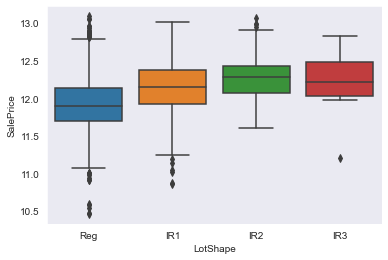

In [21]:
sns.boxplot(df.LotShape,df.SalePrice)

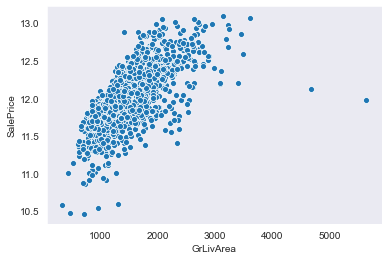

In [22]:
sns.scatterplot(df.GrLivArea,df.SalePrice)

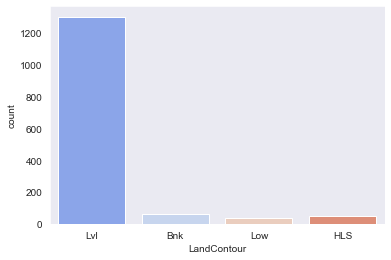

In [23]:
sns.countplot(df.LandContour,palette='coolwarm')

### Correlation matrix

In [24]:
correlation =df.corr()

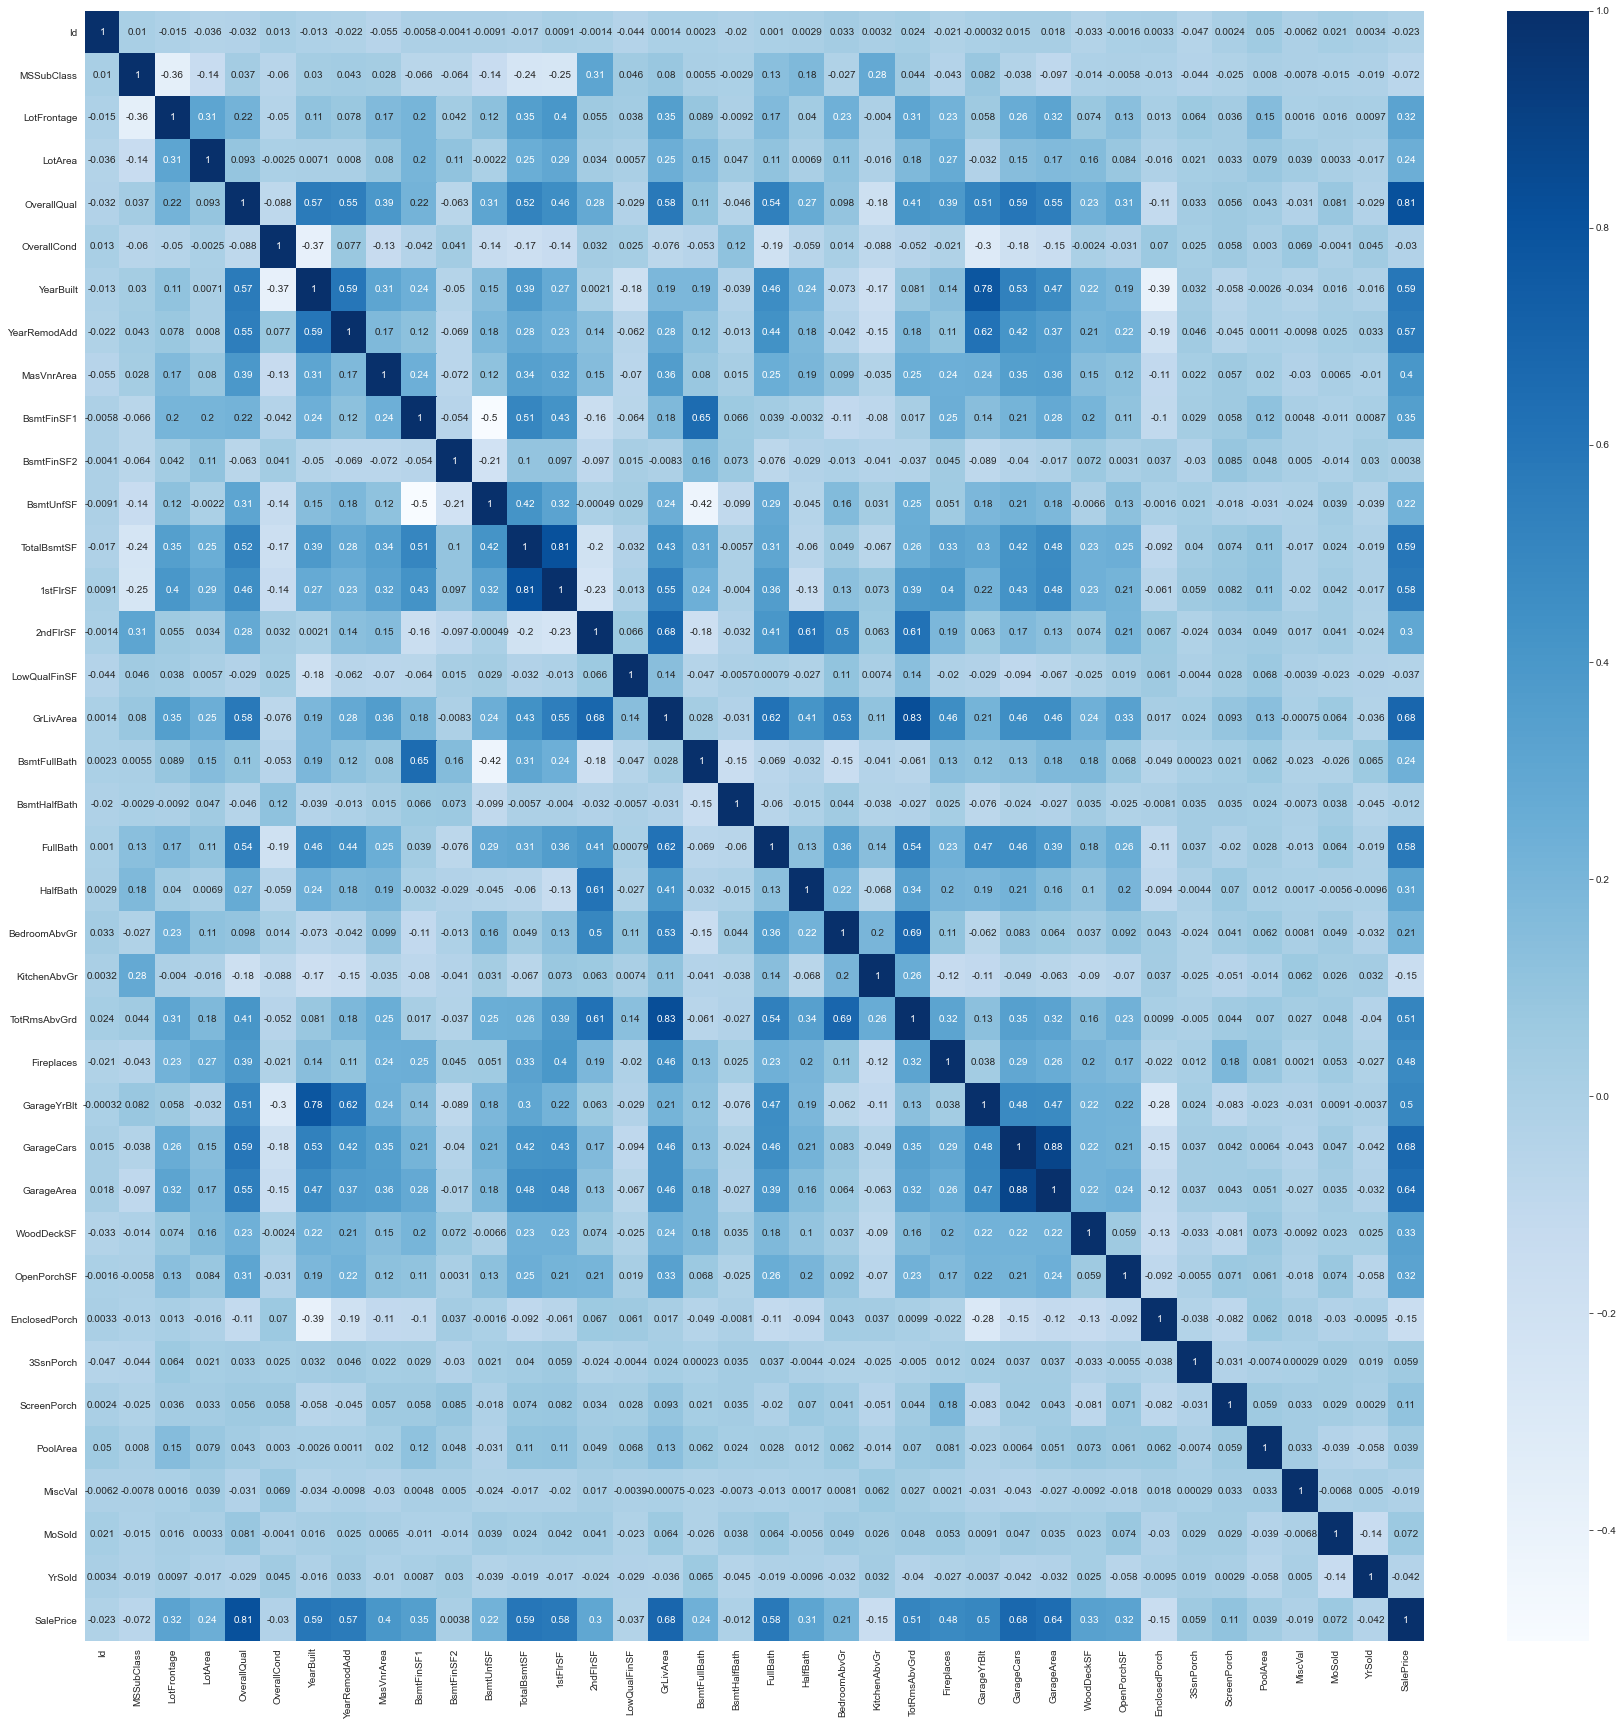

In [25]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation,annot=True,cmap='Blues')

In [26]:
correlation['SalePrice']

Id              -0.022752
MSSubClass      -0.071965
LotFrontage      0.321895
LotArea          0.244177
OverallQual      0.810603
OverallCond     -0.029897
YearBuilt        0.587350
YearRemodAdd     0.568266
MasVnrArea       0.402801
BsmtFinSF1       0.348882
BsmtFinSF2       0.003790
BsmtUnfSF        0.222270
TotalBsmtSF      0.593153
1stFlrSF         0.577582
2ndFlrSF         0.300730
LowQualFinSF    -0.036778
GrLivArea        0.683607
BsmtFullBath     0.235829
BsmtHalfBath    -0.011699
FullBath         0.581569
HalfBath         0.308792
BedroomAbvGr     0.207046
KitchenAbvGr    -0.148238
TotRmsAbvGrd     0.512018
Fireplaces       0.481881
GarageYrBlt      0.499001
GarageCars       0.675514
GarageArea       0.643988
WoodDeckSF       0.332095
OpenPorchSF      0.322372
EnclosedPorch   -0.146778
3SsnPorch        0.059176
ScreenPorch      0.109944
PoolArea         0.039344
MiscVal         -0.018895
MoSold           0.071892
YrSold          -0.042171
SalePrice        1.000000
Name: SalePr

#### From the correlation of other variables with SalePrice we can see that some variables are loosely correlated with Sale price so we can drop them

In [27]:
df = df.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','PoolArea','YrSold'],axis=1)

## Getting dummy variable for categorical columns

In [28]:
df =pd.get_dummies(data=df,columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],drop_first=True)

In [29]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,12.247694,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,12.109011,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,12.317167,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,11.849398,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,12.429216,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Now split the data into Regressor and Regressand to start our modelling

In [30]:
from sklearn.model_selection import train_test_split
X = df.drop(['Id','SalePrice'],axis=1).values
Y = df['SalePrice']

### splitting our data into train and validation set

In [31]:
X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size=0.2,random_state = 0)

### we have to normalize the whole regressor set to get better values

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# Multiple Linear Regression

In [64]:
mlin_reg = LinearRegression()
mlin_reg.fit(X_train,y_train)
cross_val_score(mlin_reg,X_val,y_val,cv = 10)

array([-9.97802185e+22, -4.88874287e+25, -2.21404884e+24, -8.54231636e+23,
       -4.01598846e+17, -3.00469795e+22, -3.98680198e+23, -1.84707371e+23,
       -1.55936609e+26, -2.11196021e+23])

### from the results we can see that multiple linear regression performs very poorly in for building this model,so we have to use other options

# Random Forest and Extra trees Regressor combined (Voting Regression)

In [55]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,VotingRegressor
SEED =101
rf_reg = RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                               warm_start=True,
                              random_state=SEED)
et_reg = ExtraTreesRegressor(n_estimators=1000, n_jobs=-1,
                               warm_start=True,
                              random_state=SEED)
vote_reg = VotingRegressor([('rf',rf_reg),('et', et_reg)], n_jobs=-1)

In [56]:
vote_reg.fit(X_train,y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                                   random_state=101,
                                                   warm_start=True)),
                            ('et',
                             ExtraTreesRegressor(n_estimators=1000, n_jobs=-1,
                                                 random_state=101,
                                                 warm_start=True))],
                n_jobs=-1)

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(vote_reg,X_val,y_val,cv = 10)

array([0.86622066, 0.80272133, 0.88937362, 0.848742  , 0.86813289,
       0.88680082, 0.89525857, 0.91977564, 0.68770272, 0.91590994])

In [58]:
pred = vote_reg.predict(X_val)

In [59]:
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score
score = r2_score(y_val,pred)*100
print('r squared score:{} '.format(score))
rmse = np.sqrt(mean_squared_log_error(y_val,pred))
print('root mean squared log error:{} '.format(rmse))
evs = explained_variance_score(y_val,pred)*100
print('explained variance score:{} '.format(evs))

r squared score:90.7178933779639 
root mean squared log error:0.008886825457680325 
explained variance score:91.03107336167905 


#### from the result we can see that it gives us a very good result but just check other regression systems to see if they perform more better than it

# Gradient Boosting regressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
grd_reg = GradientBoostingRegressor(n_estimators=1000,random_state=101,learning_rate=0.01)
grd_reg.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000,
                          random_state=101)

In [52]:
cross_val_score(grd_reg,X_val,y_val,cv = 10)

array([0.9048135 , 0.71792563, 0.89385608, 0.87777885, 0.91076959,
       0.89828829, 0.92845718, 0.92618121, 0.80022197, 0.90051144])

In [53]:
pred_2 = grd_reg.predict(X_val)

In [54]:
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score
score = r2_score(y_val,pred_2)*100
print('r squared score:{} '.format(score))
rmse = np.sqrt(mean_squared_log_error(y_val,pred_2))
print('root mean squared log error:{} '.format(rmse))
evs = explained_variance_score(y_val,pred_2)*100
print('explained variance score:{} '.format(evs))

r squared score:91.16209284153116 
root mean squared log error:0.008681554045140732 
explained variance score:91.31134887134306 


### from the results it is clear that it performs slightly better than the voting regression method

# XG boost

In [60]:
import xgboost as xgb

In [65]:
xg_reg = xgb.XGBRegressor(n_estimators=1000,n_jobs = -1,learning_rate=0.01,random_state=101)
xg_reg.fit(X_train,y_train)
cross_val_score(xg_reg,X_val,y_val,cv = 10)

[22:19:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

array([0.88543012, 0.76742613, 0.90135014, 0.88412335, 0.91496578,
       0.90159306, 0.90969409, 0.92829802, 0.7505083 , 0.89309972])

In [66]:
pred_3 = xg_reg.predict(X_val)
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score
score = r2_score(y_val,pred_3)*100
print('r squared score:{} '.format(score))
rmse = np.sqrt(mean_squared_log_error(y_val,pred_3))
print('root mean squared log error:{} '.format(rmse))
evs = explained_variance_score(y_val,pred_3)*100
print('explained variance score:{} '.format(evs))

r squared score:91.29628776252675 
root mean squared log error:0.008625785177091375 
explained variance score:91.49230200908033 


### from the results its clear that its more better than gradient boosting method

# Random Forest Regression

In [67]:
rf_reg = RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                               warm_start=True,
                              random_state=SEED)
rf_reg.fit(X_train,y_train)
cross_val_score(rf_reg,X_val,y_val,cv = 10)

array([0.8746645 , 0.79872495, 0.89942301, 0.83952575, 0.90026464,
       0.86008356, 0.88190326, 0.88456625, 0.63015475, 0.89333292])

In [68]:
pred_4 = vote_reg.predict(X_val)
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score
score = r2_score(y_val,pred_4)*100
print('r squared score:{} '.format(score))
rmse = np.sqrt(mean_squared_log_error(y_val,pred_4))
print('root mean squared log error:{} '.format(rmse))
evs = explained_variance_score(y_val,pred_4)*100
print('explained variance score:{} '.format(evs))

r squared score:90.7178933779639 
root mean squared log error:0.008886825457680318 
explained variance score:91.03107336167906 


### the results from random forest regression is quite good but it does not surpass the result from XG Boost so we take XG boost model as best model for this problem

## Best model for this housing price prediction problem is XG Boost and the results we got from this model is:
#### r squared score:91.29628776252675 
####  root mean squared log error:0.008625785177091375 
####   explained variance score:91.49230200908033 